In [65]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm

In [66]:
Nx = 50
Nt = 1000
x = np.linspace(0.,1.,Nx)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]

k = 0.01

lambda_ = (k*dt)/dx**2
print(lambda_)

0.2403403403403404


In [67]:
def ui(x):
    return 0.3*np.random.rand(1,len(x))

In [68]:
def InitU():
    
    U = np.zeros((Nt,Nx))
    U[0,:] = ui(x)
    U[:,0] = 0.1
    U[:,-1] = 0.2
    
    return U
def InitW():
    
    w = np.zeros((Nt,Nx))
    
    return w

In [69]:
U = InitU()
W = InitW()


In [70]:
def GetSolution(U,W):
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            
            U[l,i] = U[l-1,i] + lambda_*( U[l-1,i+1] - 2*U[l-1,i] + U[l-1,i-1] ) - dt*U[l-1,i-1]*(U[l-1,i-1]-0.2)*(1-U[l-1,i-1])+dt*W[l-1,i-1]
            W[l,i] = 0.03*(U[l,i]-0.3*W[l-1,i-1])
            

In [71]:
GetSolution(U,W)

100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 2410.07it/s]


<IPython.core.display.Javascript object>


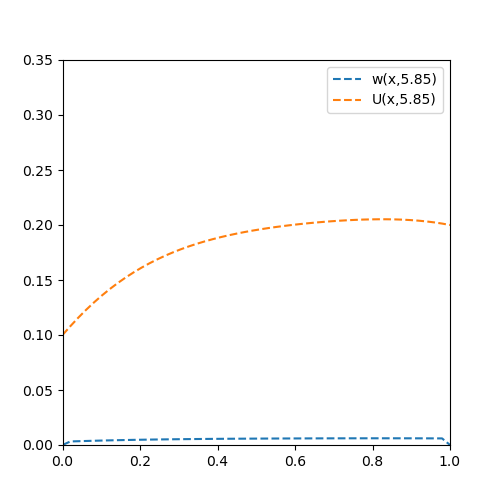

In [72]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    
    ax.clear()
    ax.set_xlim(0,1)
    ax.set_ylim(0,0.35)
    
def Update(i):
    
    init()
    ax.plot(x,W[i,:],'--', label=r'w(x,%.2f)' %(t[i]))
    ax.plot(x,U[i,:],'--', label=r'U(x,%.2f)' %(t[i]))
    ax.legend()
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)
